# K-Nearst Neighbors Model

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
df = pd.read_excel("Threshold_Data.xlsx")
# df = pd.read_excel("Cleaned_Data.xlsx")

In [3]:
df.dropna(inplace=True)

### One Hot Encoding

In [4]:
# def one_hot_encode(data, column, suffix=''):
#     encoded = pd.get_dummies(data[column], drop_first= True)
#     data = data.drop(column, axis = 1)
#     data = data.join(encoded, lsuffix='_data', rsuffix='_encoded')
#     # data = data.join(encoded)
#     return data

In [5]:
one_hot_encode = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')

In [6]:
data = df[['Income', 'Total_Children', 'Marital_Status', 'Education', 'Response', 'TotalPurchases','Complain', 'NumWebVisitsMonth','CLV','Age', 'Complain', 'Total_Spent', 'AOV']]

# data = df[['Income', 'Kidhome', 'Teenhome', 'Marital_Status', 'Education', 'Response', 'Recency', 'TotalPurchases','Complain', 'NumWebVisitsMonth','BuyingPower','Age']]

data['Marital_Status'].unique()

array(['Single', 'Married', 'Together'], dtype=object)

In [7]:

ohe_marital = one_hot_encode.fit_transform(data[['Marital_Status']])
column_names = [f"{col}_{val}" for col, val in zip(['Marital_Status'] * ohe_marital.shape[1], one_hot_encode.get_feature_names_out())]
ohe_education = one_hot_encode.fit_transform(data[['Education']])
data = data.drop(['Marital_Status', 'Education'], axis=1)
data = pd.concat([data, ohe_education], axis=1)
data = pd.concat([data, ohe_marital], axis=1)


In [8]:
data.head()

,Income,Total_Children,Response,TotalPurchases,Complain,NumWebVisitsMonth,CLV,Age,Complain,Total_Spent,AOV,Education_Graduation,Education_Master,Education_PhD,Education_n_cycle,Marital_Status_Single,Marital_Status_Together
0,84835.0,0,1,15,0,1,5772.315068,54,0,1190,79.333333,1.0,0.0,0.0,0.0,1.0,0.0
1,57091.0,0,1,18,0,5,2799.635616,63,0,577,32.055556,1.0,0.0,0.0,0.0,1.0,0.0
2,67267.0,1,0,11,0,2,1229.212329,66,0,251,22.818182,1.0,0.0,0.0,0.0,0.0,0.0
3,32474.0,2,0,4,0,7,51.217808,57,0,11,2.750000,1.0,0.0,0.0,0.0,0.0,1.0
4,21474.0,1,1,8,0,7,435.304110,35,0,91,11.375000,1.0,0.0,0.0,0.0,1.0,0.0


In [9]:
# ohe_marital = one_hot_encode.fit_transform(data[['Marital_Status']])
# column_names = [f"{col}_{val}" for col, val in zip(['Marital_Status'] * ohe_marital.shape[1], one_hot_encode.get_feature_names_out())]
# ohe_education = one_hot_encode.fit_transform(data[['Education']])
# data = data.drop(['Marital_Status', 'Education'], axis=1)
# data = pd.concat([data, ohe_education], axis=1)
# data = pd.concat([data, ohe_marital], axis=1)

# Baseline Modelling

In [10]:
X = data.drop('Response', axis=1).iloc[:,1:]


In [11]:
# X.dtypes

In [12]:
y = data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [13]:
X_train.dtypes

Total_Children               int64
TotalPurchases               int64
Complain                     int64
NumWebVisitsMonth            int64
CLV                        float64
Age                          int64
Complain                     int64
Total_Spent                  int64
AOV                        float64
Education_Graduation       float64
Education_Master           float64
Education_PhD              float64
Education_n_cycle          float64
Marital_Status_Single      float64
Marital_Status_Together    float64
dtype: object

# Scaling

In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# K-Nearest

In [15]:
classifier = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2)
classifier.fit(X_train, y_train)
preds = classifier.predict(scaler.transform(X_test))

In [16]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)

auc = roc_auc_score(y_test, preds)

In [17]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.8185
Precision: 0.3939
Recall: 0.3939
F1: 0.3939
AUC: 0.6436


# Figures

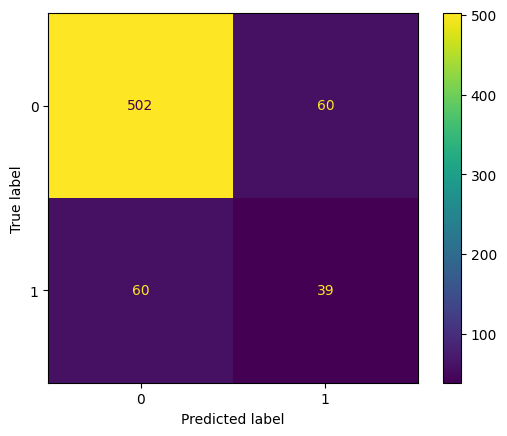

In [18]:
actual = y_test
predicted = preds


confusion_matrix = confusion_matrix(actual, predicted, labels=classifier.classes_)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = classifier.classes_)

cm_display.plot()
plt.show()